In [1]:
# import necessary modules
import raadpy as rp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import to_hex
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import os

%matplotlib widget

In [4]:
# Define some constants
raw_dir = '../Data/RAW/'
SD      = 'SD-1124'

# Directory of the buffer
buffer_fname    = raw_dir + SD + '/light1-'+SD+'-buff1.dat'
fname           = buffer_fname.split('/')[-1]

# Decode the buffer data in a dictionary
data_SiPM   = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 1")
data_PMT    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT,condition="data['id_bit'] == 0")
both_det    = rp.get_dict(buffer_fname,struct=rp.ORBIT_STRUCT)

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

Line:   0%|          | 0/1698 [00:00<?, ?it/s]

In [5]:
# Now print the PMT Data
fig1, axes  = rp.plot_buffer(data_PMT,title = 'Orbit Data of PMT Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

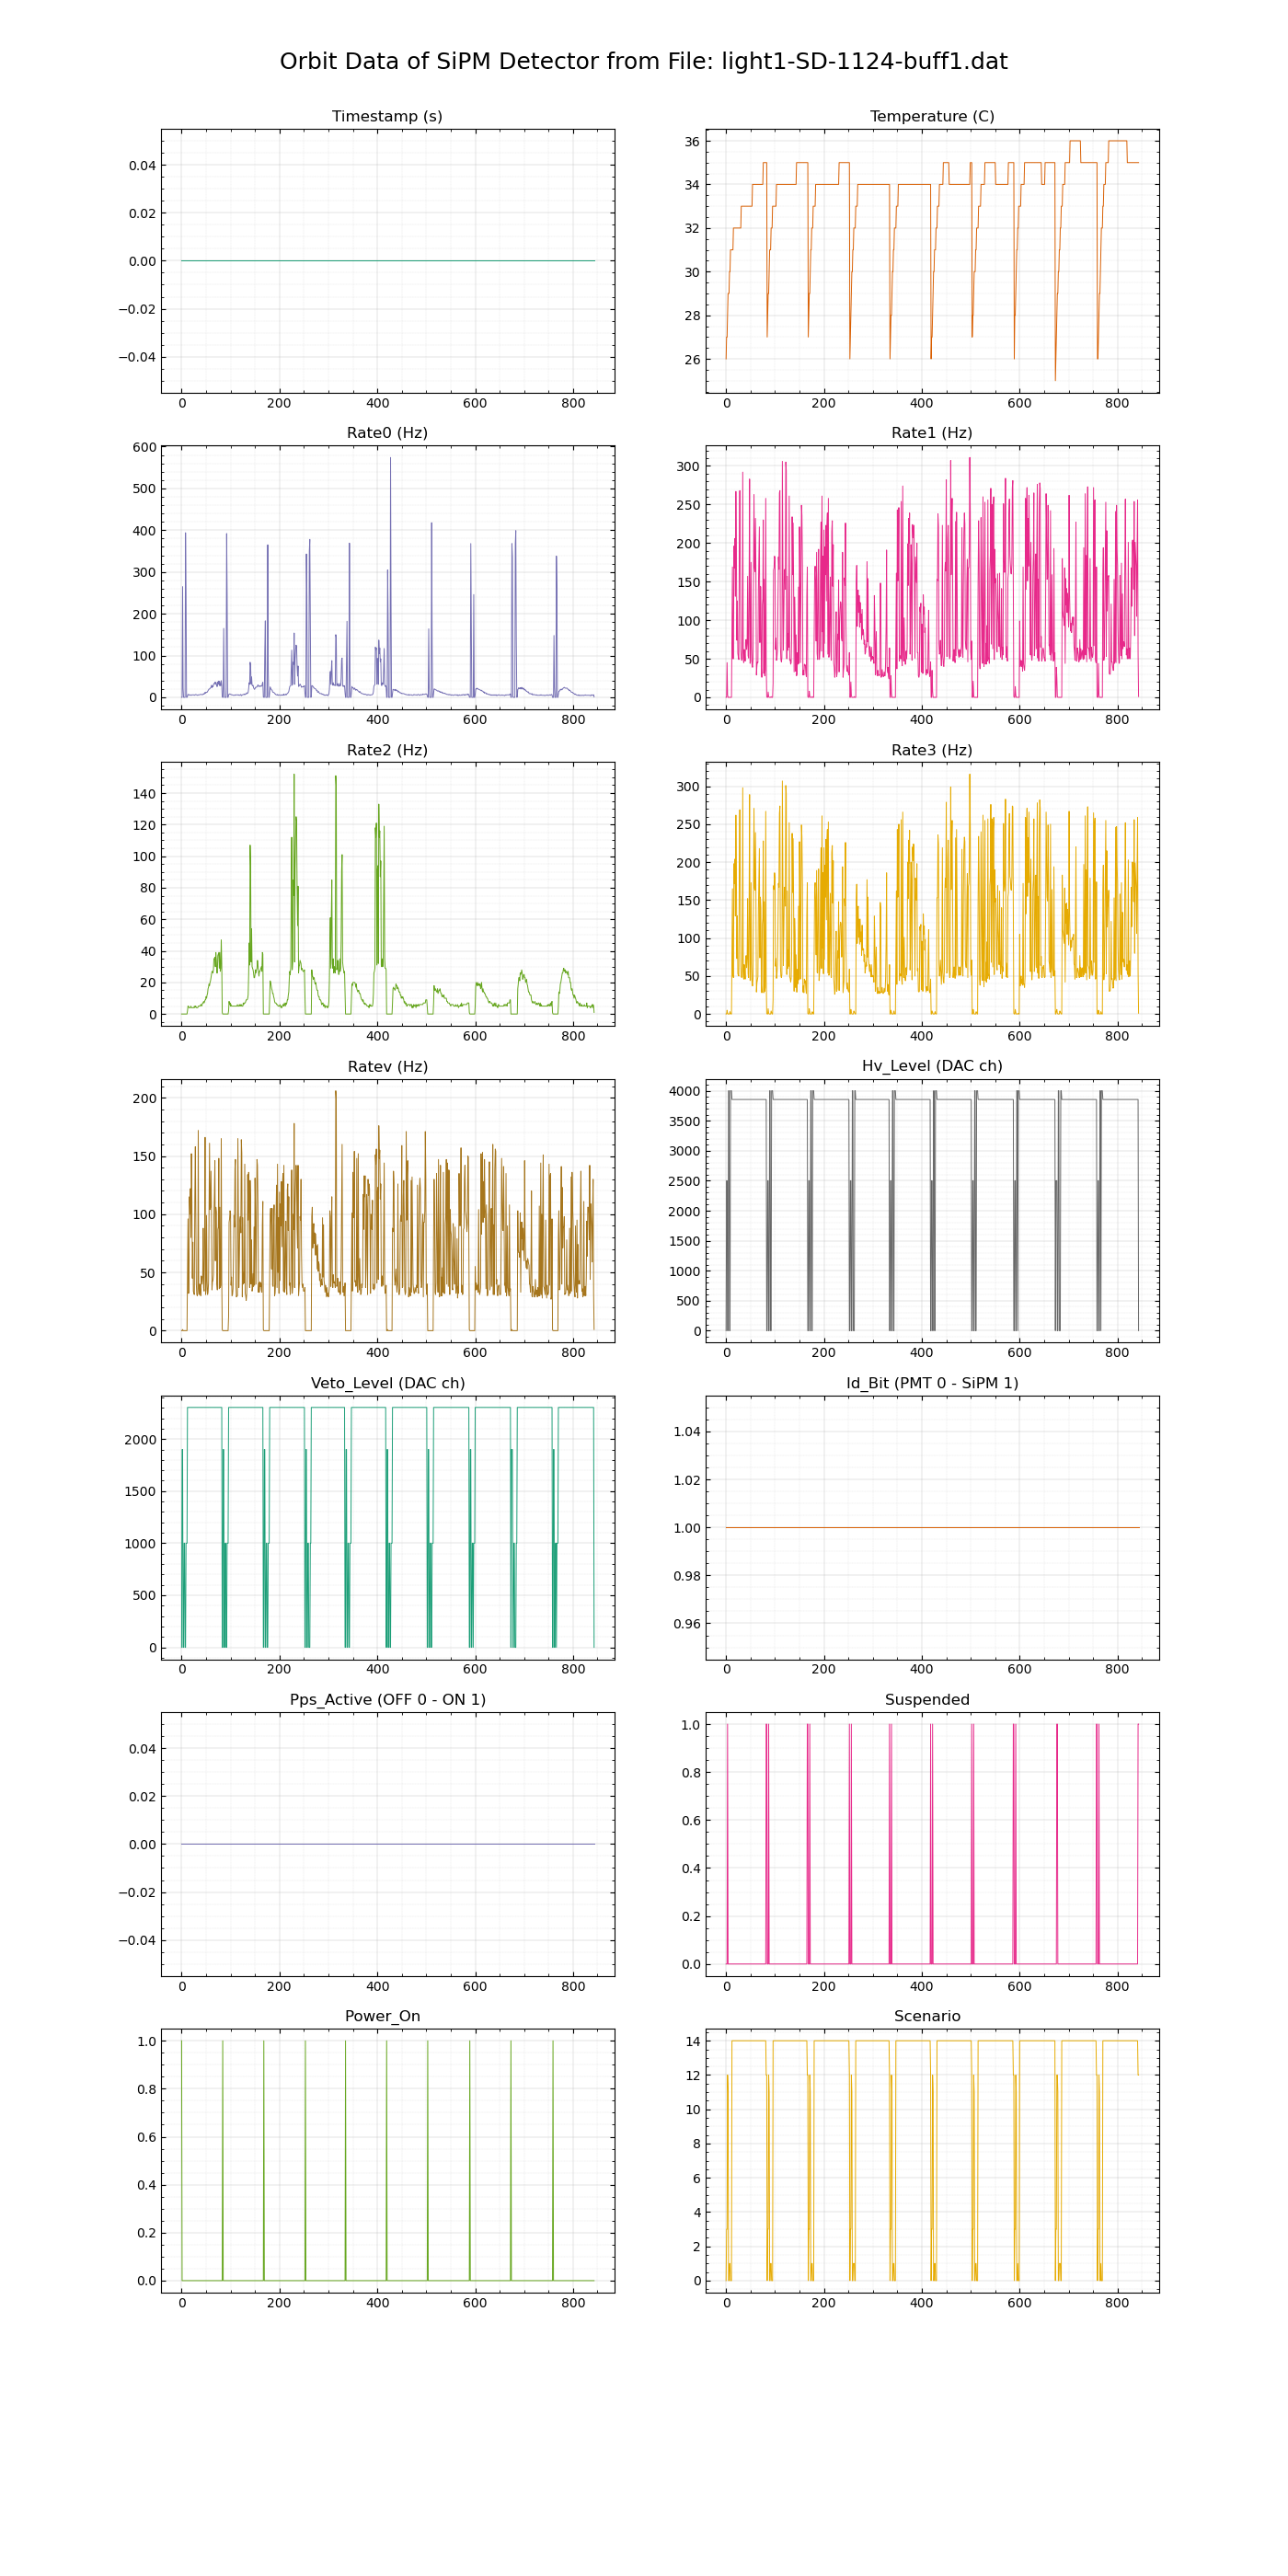

In [4]:
# Print the SiPM Data
fig2, axes = rp.plot_buffer(data_SiPM, title = 'Orbit Data of SiPM Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

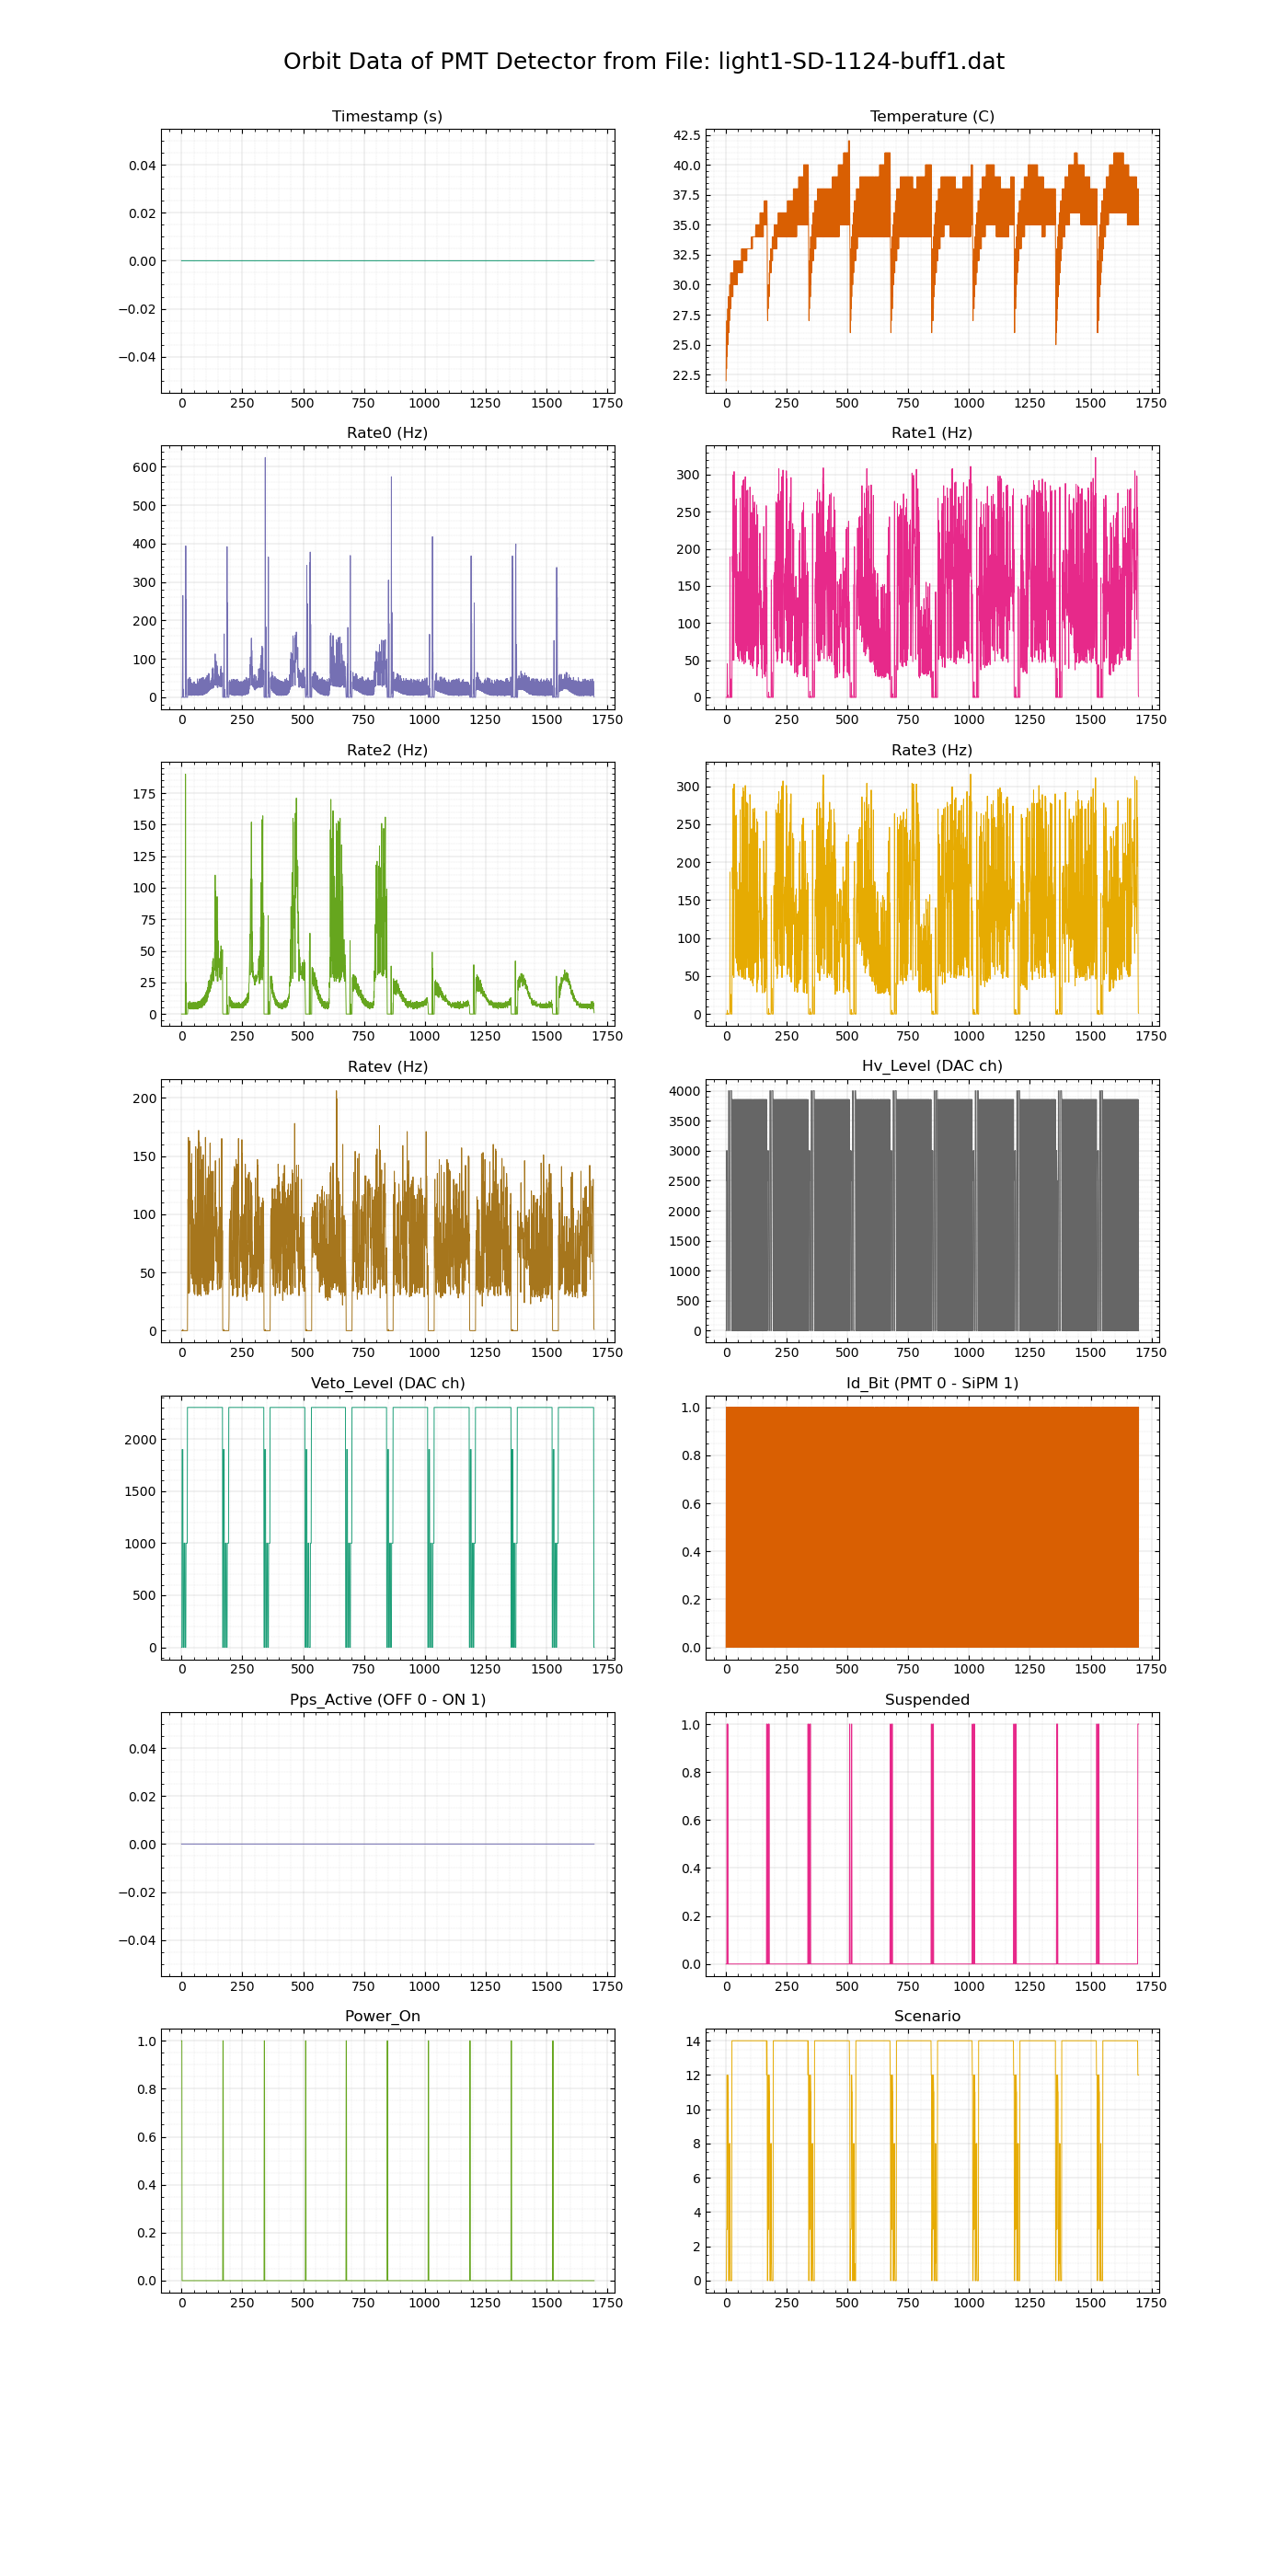

In [5]:
fig10, axes  = rp.plot_buffer(both_det,title = 'Orbit Data of PMT Detector from File: '+ fname,UNITS=rp.ORBIT_UNITS)

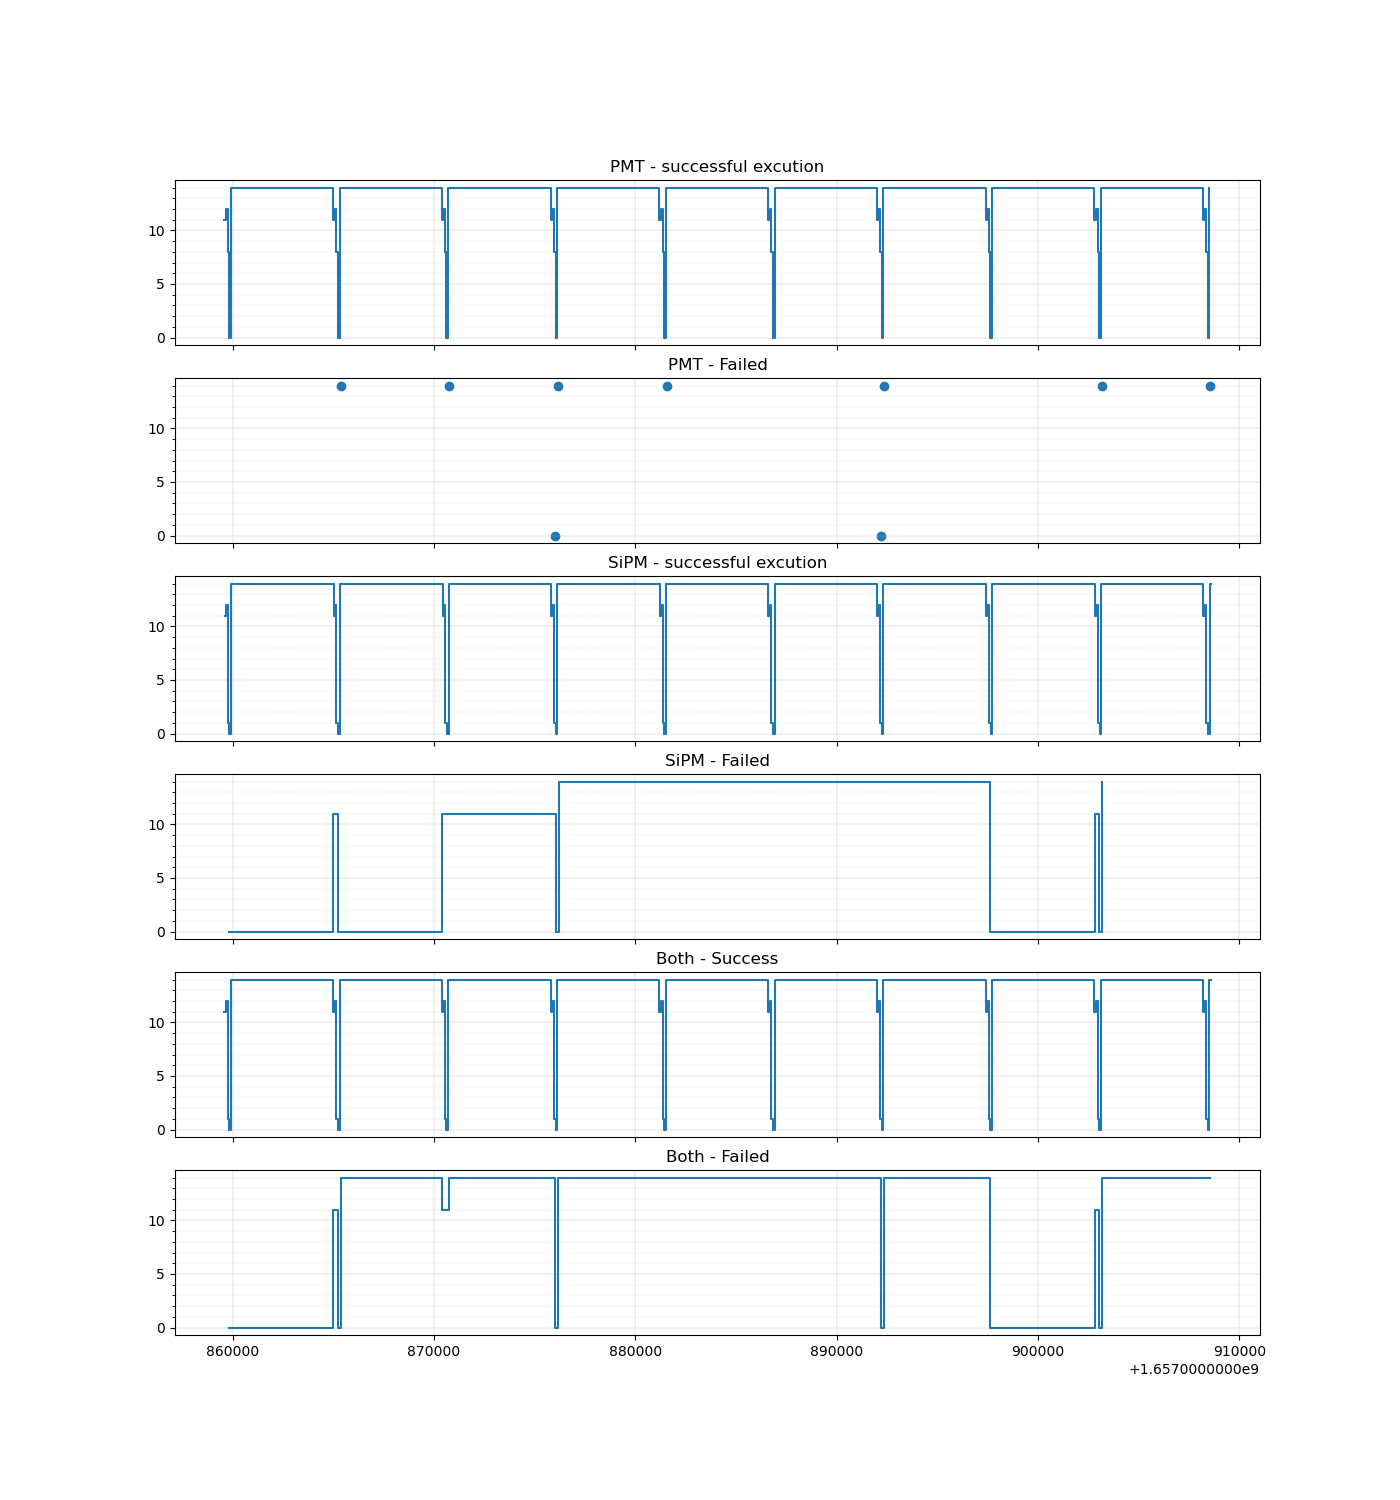

In [38]:
#  Now plot the log file of that date
# a,a,a,a,a,loglines_array = decode_log("../Data/Logs/light1-1124v2-se-log.txt")
a,a,a,a,a,loglines_array = decode_log("../Data/RAW/SD-1124/light1-SD-1124-se-log.txt")
pmt_cmds = [1,2,3,4,5,6,7,8,9,10,11,23,25,27,29,31] 
sipm_cmds = [12,13,14,15,16,17,18,19,20,21,22,24,26,28,30,32]

x_pmt, x_sipm, y_pmt, y_sipm, x_both, y_both, x_failboth, y_failboth, x_pmtfail, y_pmtfail, x_sipmfail, y_sipmfail= [],[],[],[],[],[],[],[],[],[],[],[]

for i in loglines_array:
    if i[0] == 1:

        if float(i[2]) in pmt_cmds:
            x_pmt.append(i[1])
            y_pmt.append(i[3])

        if float(i[2]) in sipm_cmds:
            x_sipm.append(i[1])
            y_sipm.append(i[3])

        if (float(i[2]) in pmt_cmds) or (float(i[2]) in sipm_cmds):
            x_both.append(i[1])
            y_both.append(i[3])

    else:
        
        if float(i[2]) in pmt_cmds:
            x_pmtfail.append(i[1])
            y_pmtfail.append(i[3])

        if float(i[2]) in sipm_cmds:
            x_sipmfail.append(i[1])
            y_sipmfail.append(i[3])

        if (float(i[2]) in pmt_cmds) or (float(i[2]) in sipm_cmds):
            x_failboth.append(i[1])
            y_failboth.append(i[3])

fig, axs = plt.subplots(6,figsize=(14,15),sharey=True,sharex=True)
axs[0].step(x_pmt, y_pmt, where='post')
axs[0].set_title('PMT - successful excution')
axs[1].scatter(x_pmtfail, y_pmtfail)
axs[1].set_title('PMT - Failed')
axs[2].step(x_sipm, y_sipm, where='post')
axs[2].set_title('SiPM - successful excution')
axs[3].step(x_sipmfail, y_sipmfail, where='post')
axs[3].set_title('SiPM - Failed')
axs[4].step(x_both,y_both,where='post')
axs[4].set_title('Both - Success')
axs[5].step(x_failboth,y_failboth,where='post')
axs[5].set_title('Both - Failed')

# axs.yaxis.set_minor_locator(AutoMinorLocator())
for ax in range(len(axs)):
    axs[ax].yaxis.set_minor_locator(AutoMinorLocator())
    axs[ax].grid(axis='both', which='major', lw=0.25)
    axs[ax].grid(axis='both', which='minor', lw=0.2, ls=':')



In [30]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(14,10))
# ax1.step(x_pmt,y_pmt,where='post')
# ax2.step(x_sipm,y_sipm,where='post')
# ax3.step(x_both,y_both,where='post')
# ax4.step(x_failboth,y_failboth,where='post')

# ax1.yaxis.set_minor_locator(AutoMinorLocator())
# ax1.grid(axis='both', which='major', lw=0.25)
# ax1.grid(axis='both', which='minor', lw=0.2, ls=':')

# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax2.grid(axis='both', which='major', lw=0.25)
# ax2.grid(axis='both', which='minor', lw=0.2, ls=':')

# ax3.yaxis.set_minor_locator(AutoMinorLocator())
# ax3.grid(axis='both', which='major', lw=0.25)
# ax3.grid(axis='both', which='minor', lw=0.2, ls=':')

# ax4.yaxis.set_minor_locator(AutoMinorLocator())
# ax4.grid(axis='both', which='major', lw=0.25)
# ax4.grid(axis='both', which='minor', lw=0.2, ls=':')

# ax3.plot(1,1657859661, 10)
# print(x_pmt)


# fig3 = plt.plot(x,y)
# print (x_pmt,'\n\n',x_sipm)

## Plan for next week (25-29 Jul 2022)

- [ ] Correlating our log file with the scenario from buffer using the failed attempts
- [ ] Read the thing panos sent
- [ ] Plot a scatter diagram on top of each graph of the fails
- [ ] Attempt minimization on the graphs

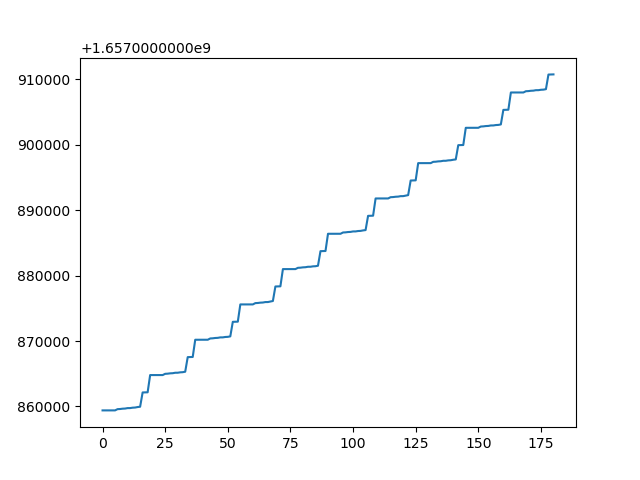

In [71]:
fig5 = plt.figure()
plt.plot(x_pmt)

In [3]:
# print(loglines_array)

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import csv

# Parse a command
def desc_finder(line:str,cmdlist,outputs,i,time,failed_idx):
    """Parse a command and return its status and description

    Args:
        line (str): The string of the command
        cmdlist (pd.DataFrame): pandas data frame with the commands and their equivalent messages
        outputs (_type_): _description_
        i (_type_): _description_
        time (_type_): _description_
        failed_idx (_type_): _description_

    Returns:
        _type_: _description_
    """

    # Get the description
    status = 1
    splt = line.split(' ')

    # define end of log file
    if splt[-1] == 'SE0>':
        # desc = 'LOG END'
        desc = [-1,17]
        text = "LOG END"

    # define commands from the command file
    elif 'txrx' in splt[1]:
        node,port,msg = int(splt[2]),int(splt[3]),str(splt[5])

        index = cmdlist.loc[(cmdlist['NODE']==node) & (cmdlist['PORT']==port) & (cmdlist['Message'].str.startswith(msg)),['ID_COMMAND_Proposed','ID_in_Graph']]
        
        # include the power shutdown
        if node == 4:
            index = cmdlist.loc[(cmdlist['NODE']==node) & (cmdlist['PORT']==port),['ID_COMMAND_Proposed','ID_in_Graph']]

        # include the custom scenario
        if port == 9:
            index = cmdlist.loc[(cmdlist['NODE']==node) & (cmdlist['PORT']==port),['ID_COMMAND_Proposed','ID_in_Graph']]
        

        #If index did not find anything
        if len(index) == 0:
            desc = [] 
            text = "not a payload cmnd"
            
        # if command found in command list
        else:
            desc = list(index.to_numpy()[0])
            text = "cmnd found in list"
        

        if i in [fid for fid in failed_idx]:
            time = time + (float(splt[4])/1000)
            status = -1
        

    elif splt[1] == 'delay':
        time = time + (float(splt[2])/1000)
        desc = []
        text = "delay of"

    elif splt[1] == 'delayuntil':
        time = float(splt[2])
        desc = []
        text = "delay until"

    elif 'read' in splt[1]:
        time = float(outputs[i][0].split(' ')[3])
        desc = []
        text = "read the current time"

    else:
        desc = []
        text = "unidentified command"
    
    return desc,time,status,text

# Decode a logfile
def decode_log(filename:str="../../../Data/Logs/light1-1124v2-se-log.txt"):
    """Take a log file and parse its commands to uncover thier timestamps

    Args:
        filename (str, optional): The filepath and filename of the log file. Defaults to "../../../Data/Logs/light1-SD-1016-se-log.txt".

    Returns:
        _type_: Log, commands, outputs, description, failed_idx, loglines_array
    """

    # Load the logfile
    logfile = open(filename)
    cmdlist = pd.read_csv("command_list.csv")

    # Load the lines
    loglines = logfile.readlines()

    # Close the file
    logfile.close()

    # Create an array with the lines
    commands    = []
    outputs     = []
    idx         = []
    description = []
    times       = []
    fails       = []
    failed_idx  = []
    text_desc   = []

    # Get commands and their indices
    for i, line in enumerate(loglines):
        if 'SE0>' in line:
            commands.append(line)
            idx.append(i)

    # Check if the last command was empty
    if loglines[-1] != 'SE0>':
        commands.append('SE0>')
        idx.append(len(loglines))

    # Get the command output
    for i in range(len(idx)-1):
        out = []
        if 'SE0>#' not in commands[i]:
            for j in range(idx[i]+1,idx[i+1]):
                out.append(loglines[j])
        
        outputs.append(out)

    # Create the dictionary
    log = [[command,output] for command,output in zip(commands,outputs)]

    # Check which commands executed correcly
  

    # Find the commands that failed
    for i in range(len(commands)-1):
        for output in log[i][1]:
            if 'FAIL' in output:
                failed_idx.append(i)


    # Initialize time at 0s
    time = 0
    
    # Give commands and use the finder function to pull the description, time ran, and if the command failed.
    for k, id in enumerate(idx):
        c = commands[k]
        cmd = c.split('\n')[0]
        desc,time,failed,text = desc_finder(cmd,cmdlist,outputs,k,time,failed_idx)

        if len(desc) != 0:
            description.append(desc)
            times.append(time)
            fails.append(failed)
            text_desc.append(text)
    tempname = 'templog.csv'
    fileDir = os.path.join('Defined_Logs')

    if not os.path.exists(fileDir):
        os.makedirs(fileDir)
    
    filePath = os.path.join(fileDir, tempname)

    #Name the headers of the CSV File
    header = ['status','time','description','ID_in_Graph']

    loglines_array = []

    #Clear the file and write from scratch
    with open(filePath, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)

        for i in range(len(description)):
            g = (fails[i], times[i], description[i][0],description[i][1])#,text_desc[i])
            loglines_array.append(g)
            writer.writerow(g)

    # Return everything else
    return log, commands[:-1], outputs, description, failed_idx, loglines_array
